In [72]:
import pandas as pd
import numpy as np
import plotly_express as px
import seaborn as sns; sns.set()
from numpy.linalg import norm, eigh
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from gensim.models import word2vec
from sklearn.manifold import TSNE

In [76]:
LIB = pd.read_csv("data/LIB.csv").set_index(['book_num'])
TFIDF_chap = pd.read_csv("data/TFIDF.csv").set_index(['book_num', 'chap_num'])
CORPUS = pd.read_csv("data/CORPUS.csv").set_index(['book_num', 'chap_num'])
TFIDF_L2 = pd.read_csv("data/TFIDF_L2.csv").set_index(['book_num', 'chap_num'])

In [3]:
TFIDF_book = TFIDF_chap.groupby('book_num').mean()

00   05  080712    1  100   15  150pound   17   18    2  \
book_num chap_num                                                             
0        1         0.0  0.0     0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0   
         2         0.0  0.0     0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0   
         3         0.0  0.0     0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0   
         4         0.0  0.0     0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0   
         5         0.0  0.0     0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0   
...                ...  ...     ...  ...  ...  ...       ...  ...  ...  ...   
5        53        0.0  0.0     0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0   
         54        0.0  0.0     0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0   
         55        0.0  0.0     0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0   
         56        0.0  0.0     0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0   
         57        0.0  0.0     0.0  0.0  0.0  0.0       0.0  0.0  0.0  0.0   

                   ...  zipper  zippers  zipping      zips     zling  zoe  \
book_num chap_num  ...                                                      
0        1         ...     0.0      0.0      0.0  0.000000  0.000000  0.0   
         2         ...     0.0      0.0      0.0  0.030913  0.000000  0.0   
         3         ...     0.0      0.0      0.0  0.000000  0.000000  0.0   
         4         ...     0.0      0.0      0.0  0.000000  0.000000  0.0   
         5         ...     0.0      0.0      0.0  0.000000  0.048154  0.0   
...                ...     ...      ...      ...       ...       ...  ...   
5        53        ...     0.0      0.0      0.0  0.000000  0.000000  0.0   
         54        ...     0.0      0.0      0.0  0.000000  0.000000  0.0   
         55        ...     0.0      0.0      0.0  0.000000  0.000000  0.0   
         56        ...     0.0      0.0      0.0  0.000000  0.000000  0.0   
         57        ...     0.0      0.0      0.0  0.000000  0.000000  0.0   

                   zone  zones  zoom  zooms  
book_num chap_num                            
0        1          0.0    0.0   0.0    0.0  
         2          0.0    0.0   0.0    0.0  
         3          0.0    0.0   0.0    0.0  
         4          0.0    0.0   0.0    0.0  
         5          0.0    0.0   0.0    0.0  
...                 ...    ...   ...    ...  
5        53         0.0    0.0   0.0    0.0  
         54         0.0    0.0   0.0    0.0  
         55         0.0    0.0   0.0    0.0  
         56         0.0    0.0   0.0    0.0  
         57         0.0    0.0   0.0    0.0  

[223 rows x 18111 columns]

## Riff 1

In [4]:
corr_type = 'pearson'
# corr_type = 'kendall'
# corr_type = 'spearman'

In [5]:
CORR_MATRIX = TFIDF_chap.T.corr(corr_type)

<Axes: xlabel='book_num-chap_num', ylabel='book_num-chap_num'>

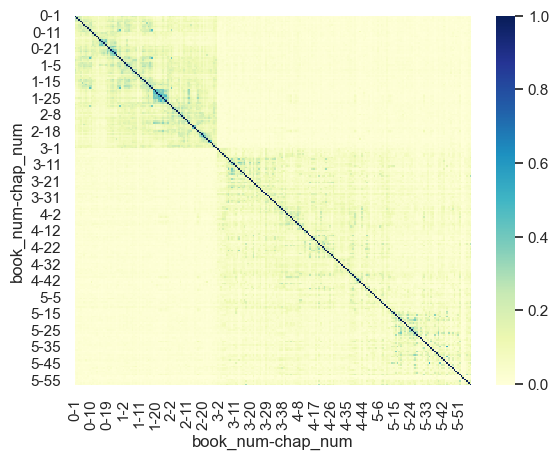

In [6]:
sns.heatmap(CORR_MATRIX, cmap="YlGnBu")

In [7]:
CORR_MATRIX = TFIDF_book.T.corr(corr_type)

<Axes: xlabel='book_num', ylabel='book_num'>

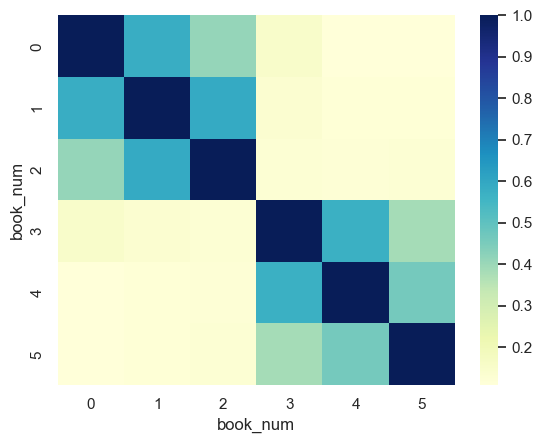

In [8]:
sns.heatmap(CORR_MATRIX, cmap="YlGnBu")

In [9]:
# corr_type = 'pearson'
corr_type = 'kendall'
# corr_type = 'spearman'

In [10]:
CORR_MATRIX = TFIDF_chap.T.corr(corr_type)

<Axes: xlabel='book_num-chap_num', ylabel='book_num-chap_num'>

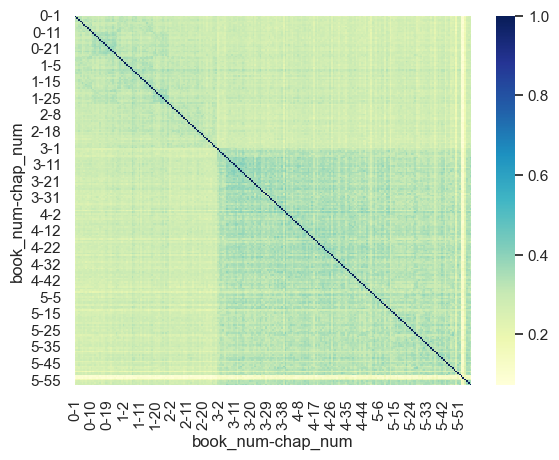

In [11]:
sns.heatmap(CORR_MATRIX, cmap="YlGnBu")

In [12]:
CORR_MATRIX = TFIDF_book.T.corr(corr_type)

<Axes: xlabel='book_num', ylabel='book_num'>

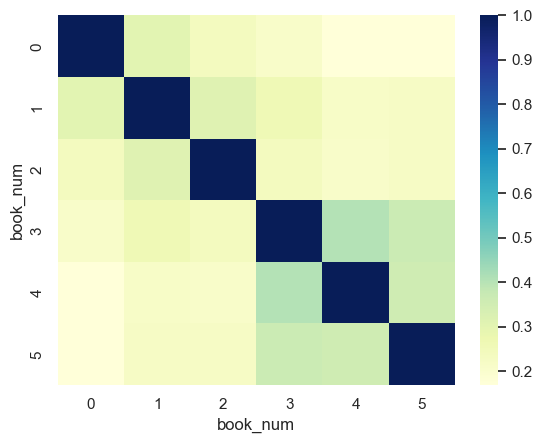

In [13]:
sns.heatmap(CORR_MATRIX, cmap="YlGnBu")

In [14]:
# corr_type = 'pearson'
# corr_type = 'kendall'
corr_type = 'spearman'

In [15]:
CORR_MATRIX = TFIDF_chap.T.corr(corr_type)

<Axes: xlabel='book_num-chap_num', ylabel='book_num-chap_num'>

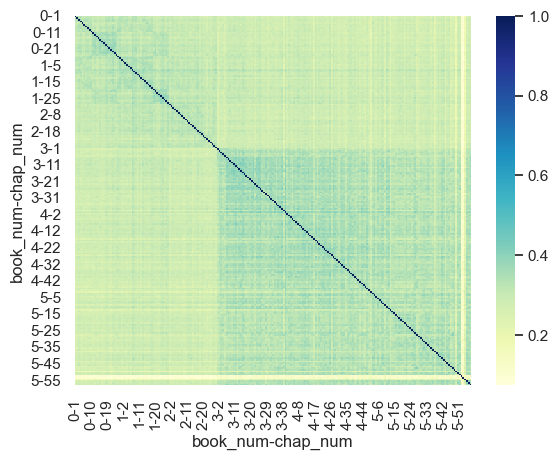

In [16]:
sns.heatmap(CORR_MATRIX, cmap="YlGnBu")

In [17]:
CORR_MATRIX = TFIDF_book.T.corr(corr_type)

<Axes: xlabel='book_num', ylabel='book_num'>

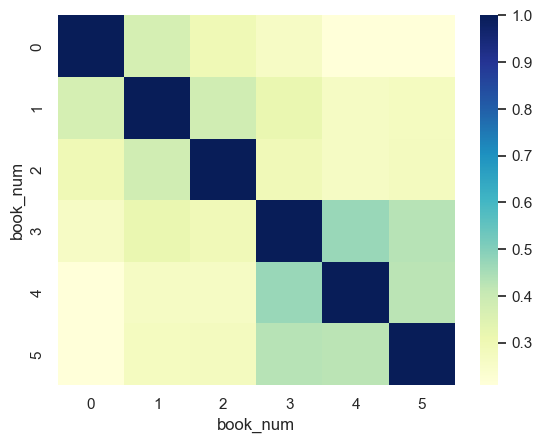

In [18]:
sns.heatmap(CORR_MATRIX, cmap="YlGnBu")

## Riff 2

In [23]:
divergent = CORPUS.loc[3]
insurgent = CORPUS.loc[4]
allegiant = CORPUS.loc[5]

In [44]:
B_div = divergent['term_str'].reset_index(drop=True).to_frame().reset_index().rename(columns={'index':'offset'})
B_ins = insurgent['term_str'].reset_index(drop=True).to_frame().reset_index().rename(columns={'index':'offset'})
B_all = allegiant['term_str'].reset_index(drop=True).to_frame().reset_index().rename(columns={'index':'offset'})
B = CORPUS['term_str'].reset_index(drop=True).to_frame().reset_index().rename(columns={'index':'offset'})

In [40]:
def plot_words(words, book):    
    
    X = book[book.term_str.isin(words)]
    
    plt.figure(figsize=(22, len(words)))
    
    ax = sns.stripplot(y='term_str', x='offset', data=X, orient='h', marker=".", color='navy', size=15, jitter=0)
    ax.set_title('Dispersion Plots', size=30, pad=20)
    ax.set_xlabel('Narrative Time', size=20)
    ax.set_ylabel('Term', size=20)
    
    plt.xticks(rotation=0, fontsize=20)
    plt.yticks(rotation=0, fontsize=20)
    plt.tight_layout()
    plt.show()

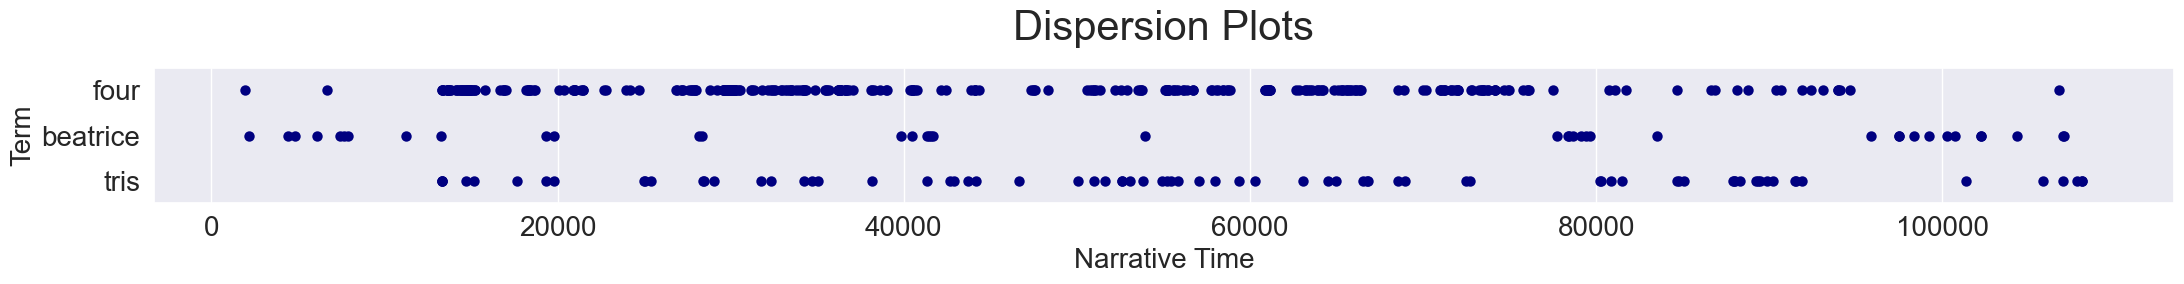

In [41]:
plot_words(['beatrice', 'tris', 'four'], B_div)

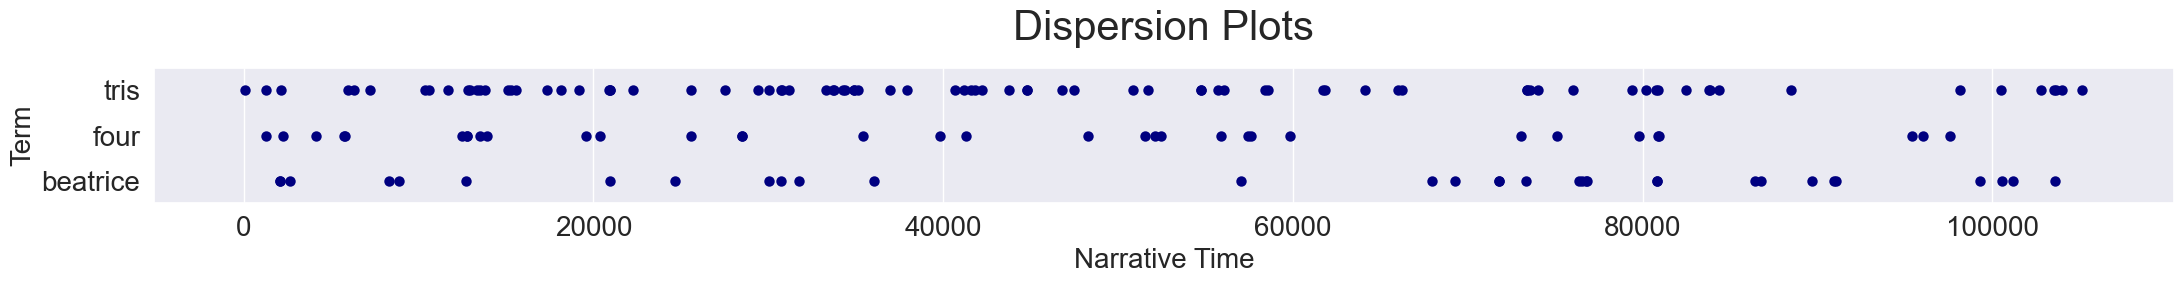

In [42]:
plot_words(['beatrice', 'tris', 'four'], B_ins)

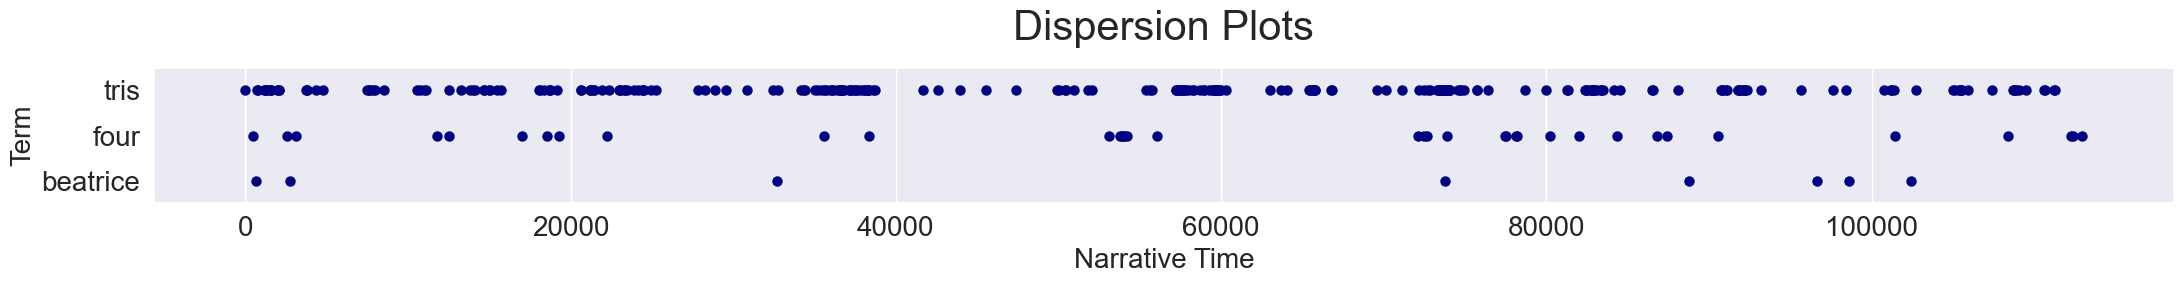

In [43]:
plot_words(['beatrice', 'tris', 'four'], B_all)

In [48]:
common_words = [
    "survival",
    "resistance",
    "identity",
    "conflict",
    "power",
    "sacrifice",
    "courage",
    "friendship",
    "oppression",
    "change",
    "rebel"
]

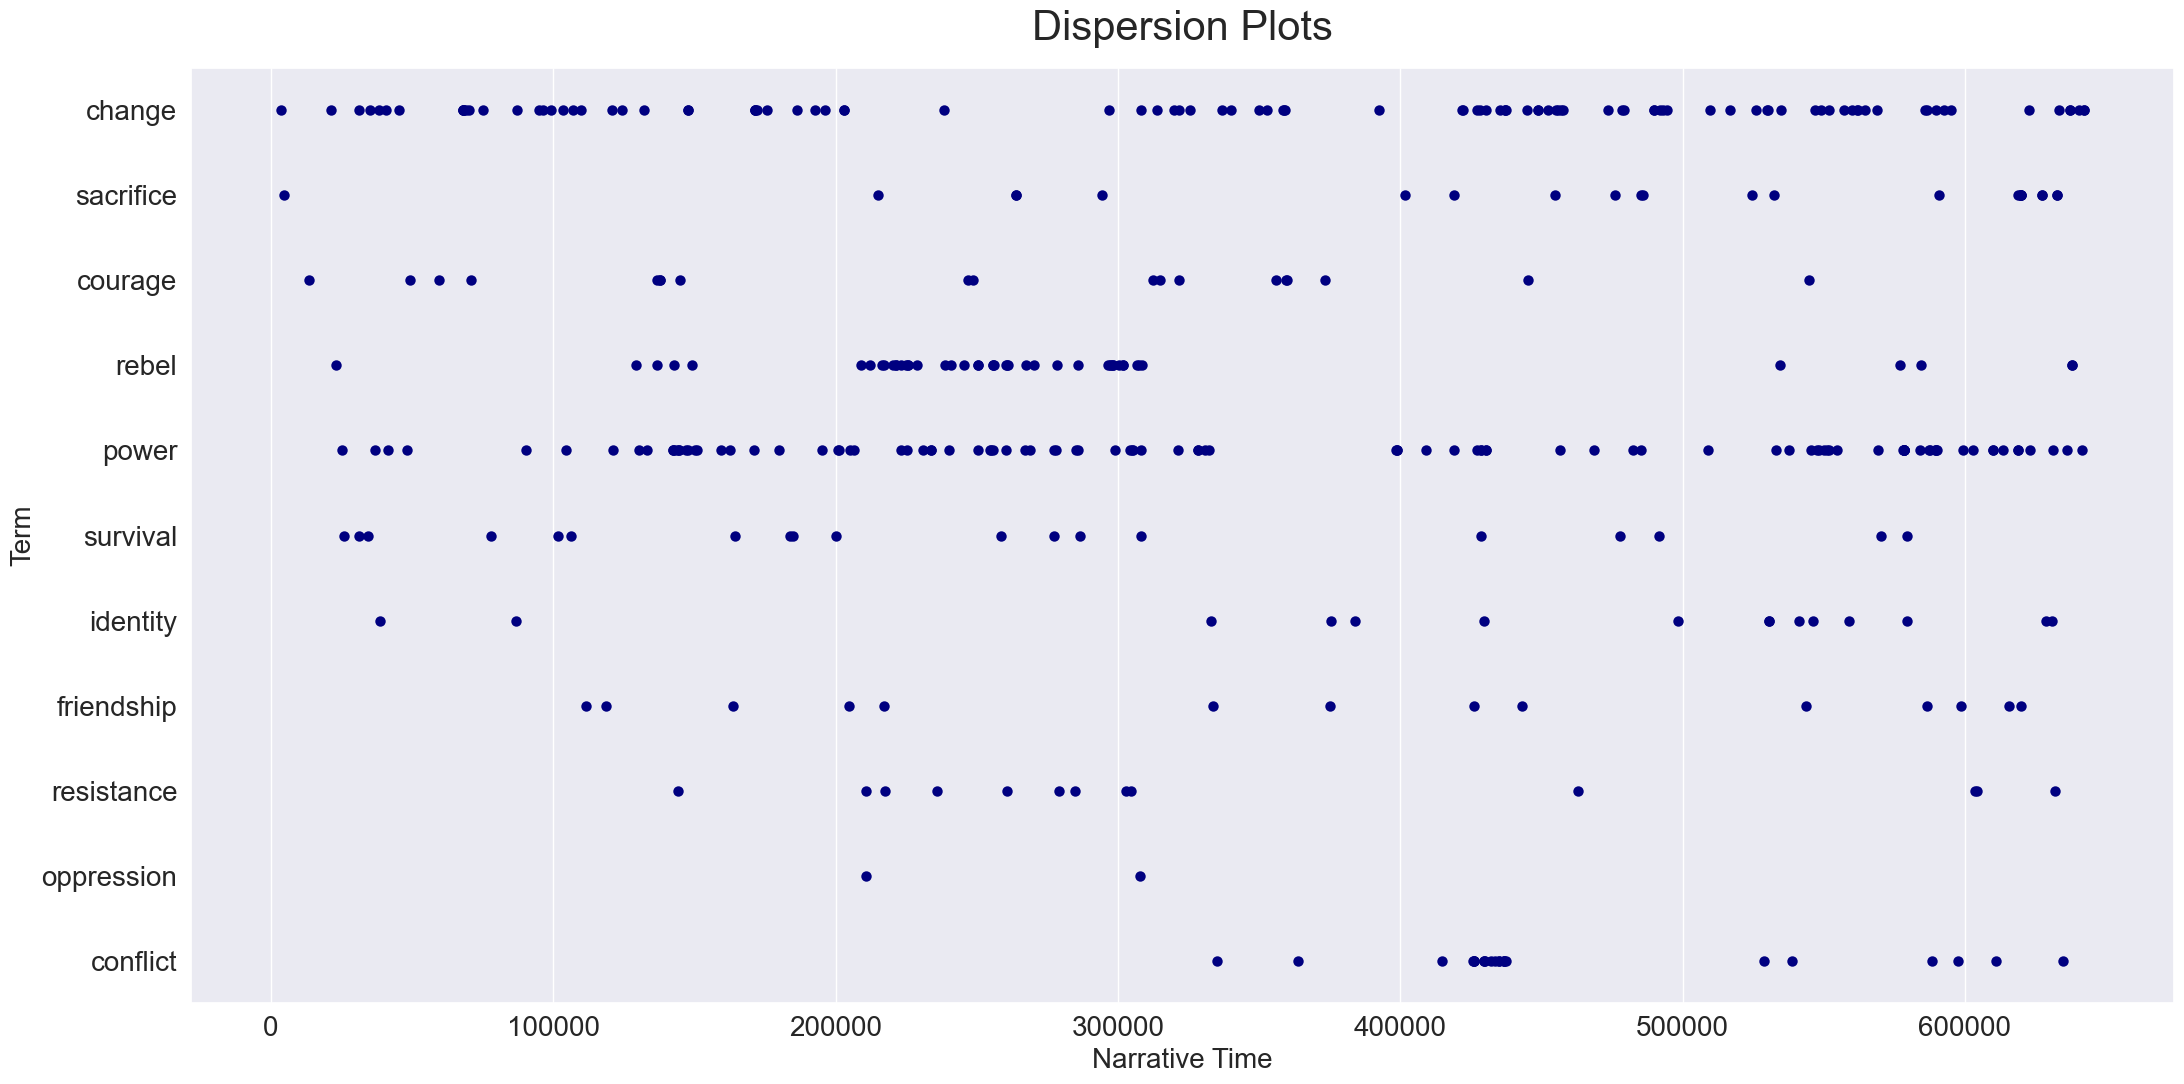

In [49]:
plot_words(common_words, B)

## Riff 3

In [50]:
LIB

,book_num,title,author,year,genre,cover color,file,txt_str,n_char
0,0,Hunger Games,Collins,2008,adventure,black,Collins_HungerGames,Books/Collins_HungerGames.txt,543533
1,1,Catching Fire,Collins,2009,dystopian,red,Collins_CatchingFire,Books/Collins_CatchingFire.txt,650245
2,2,Mockingjay,Collins,2010,adventure,blue,Collins_Mockingjay,Books/Collins_Mockingjay.txt,562696
3,3,Divergent,Roth,2011,dystopian,blue,Roth_Divergent,Books/Roth_Divergent.txt,664476
4,4,Insurgent,Roth,2012,romance,green,Roth_Insurgent,Books/Roth_Insurgent.txt,579698
5,5,Allegiant,Roth,2013,romance,red,Roth_Allegiant,Books/Roth_Allegiant.txt,604651


In [69]:
def get_pca(TFIDF, 
            k=10, 
            norm_docs=True,
            norm_level=2,
            center_by_mean=True, 
            center_by_variance=False):
    
    if norm_docs:
        TFIDF = (TFIDF.T / norm(TFIDF, 2, axis=1)).T
    
    if center_by_mean:
        TFIDF = TFIDF - TFIDF.mean()
        
    if center_by_variance:
        TFIDF = TFIDF / TFIDF.std()        

    COV = TFIDF.cov()

    eig_vals, eig_vecs = eigh(COV)
    
    EIG_VEC = pd.DataFrame(eig_vecs, index=COV.index, columns=COV.index)
    EIG_VAL = pd.DataFrame(eig_vals, index=COV.index, columns=['eig_val'])
    EIG_VAL.index.name = 'term_str'
        
    EIG_IDX = EIG_VAL.eig_val.sort_values(ascending=False).head(k)
    
    COMPS = EIG_VEC[EIG_IDX.index].T
    COMPS.index = [i for i in range(COMPS.shape[0])]
    COMPS.index.name = 'pc_id'

    LOADINGS = COMPS.T

    DCM = TFIDF.dot(LOADINGS)
    
    COMPINF = pd.DataFrame(index=COMPS.index)

    for i in range(k):
        for j in [0, 1]:
            top_terms = ' '.join(LOADINGS.sort_values(i, ascending=bool(j)).head(5).index.to_list())
            COMPINF.loc[i, j] = top_terms
    COMPINF = COMPINF.rename(columns={0:'pos', 1:'neg'})
    
    COMPINF['eig_val'] = EIG_IDX.reset_index(drop=True).to_frame()
    COMPINF['exp_var'] = COMPINF.eig_val / COMPINF.eig_val.sum()
    
    return LOADINGS, DCM, COMPINF

In [73]:
LOADINGS, DCM, COMPINF = get_pca(TFIDF_L2, 
                                 k=10, 
                                 norm_docs=True,
                                 norm_level=2,
                                 center_by_mean=True, 
                                 center_by_variance=False)

In [77]:
DOC = pd.DataFrame(index=TFIDF_L2.index).join(LIB)

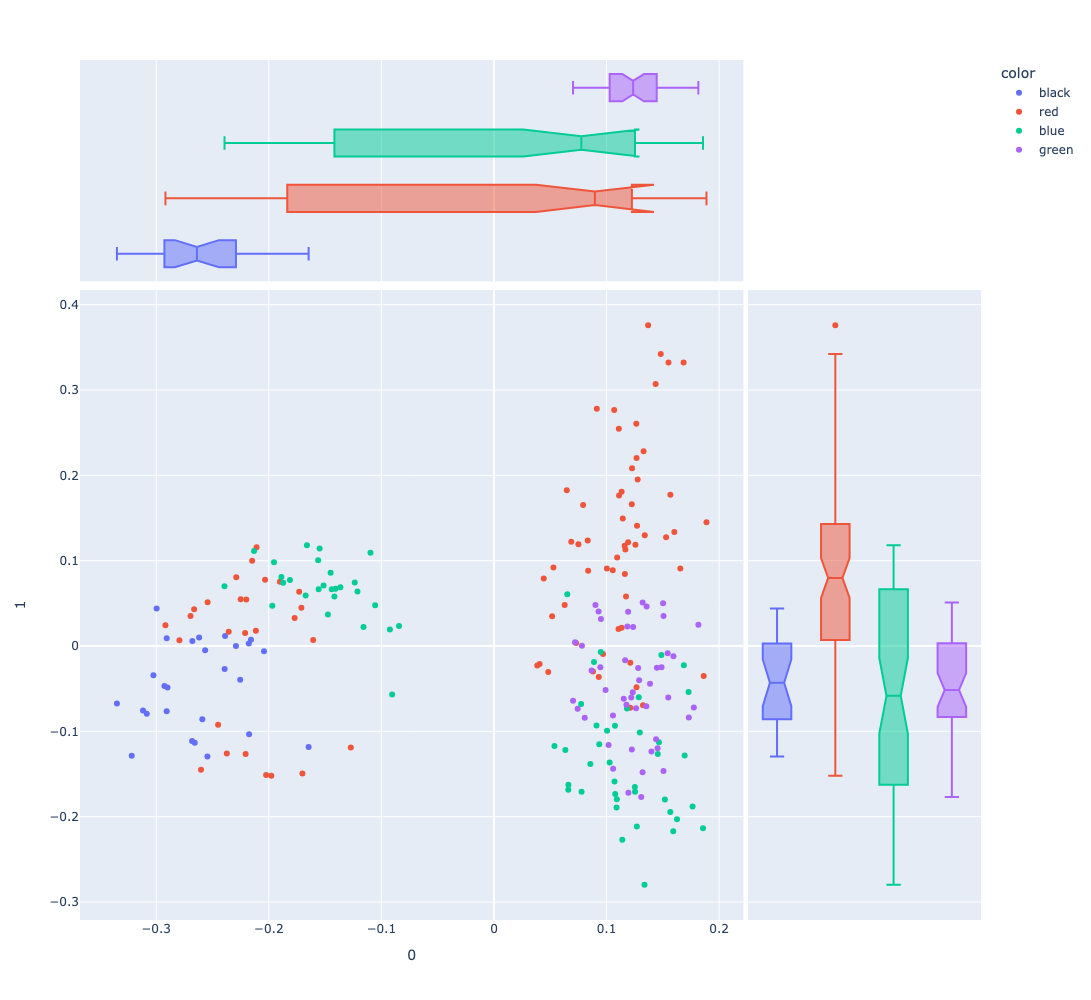

In [79]:
px.scatter(DCM, 0, 1, 
           color=DOC['cover color'], 
           hover_name=DOC.file, 
           marginal_x='box', marginal_y='box', height=1000)

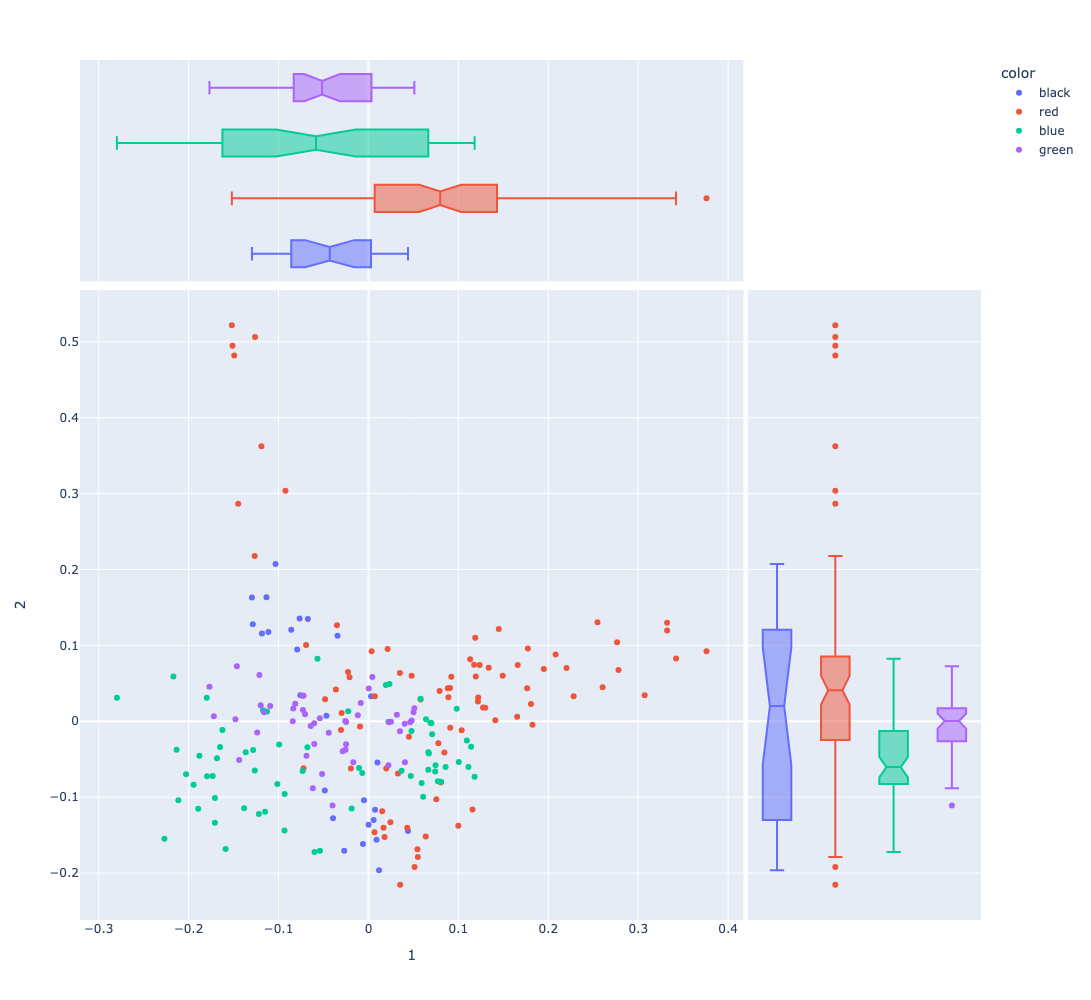

In [80]:
px.scatter(DCM, 1, 2, 
           color=DOC['cover color'], 
           hover_name=DOC.file, 
           marginal_x='box', marginal_y='box', height=1000)

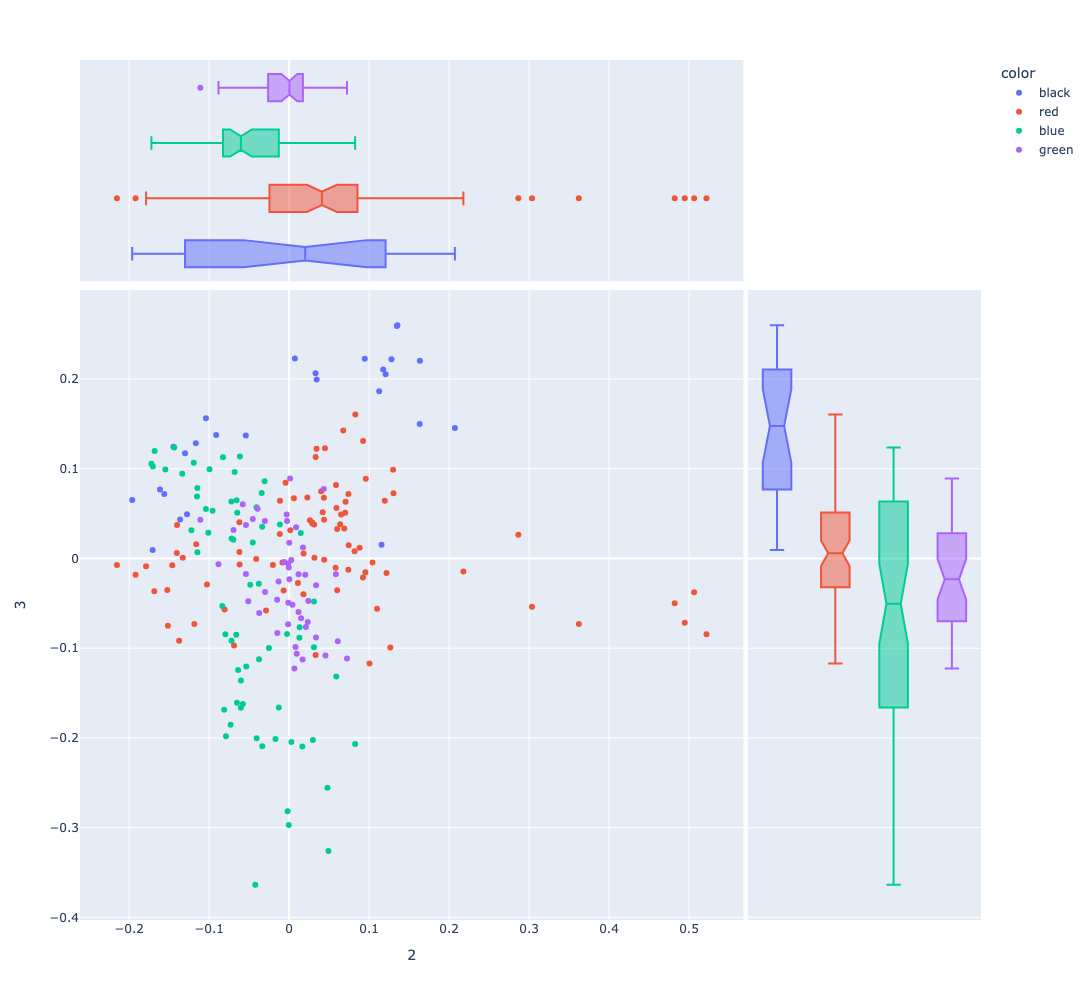

In [81]:
px.scatter(DCM, 2, 3, 
           color=DOC['cover color'], 
           hover_name=DOC.file, 
           marginal_x='box', marginal_y='box', height=1000)

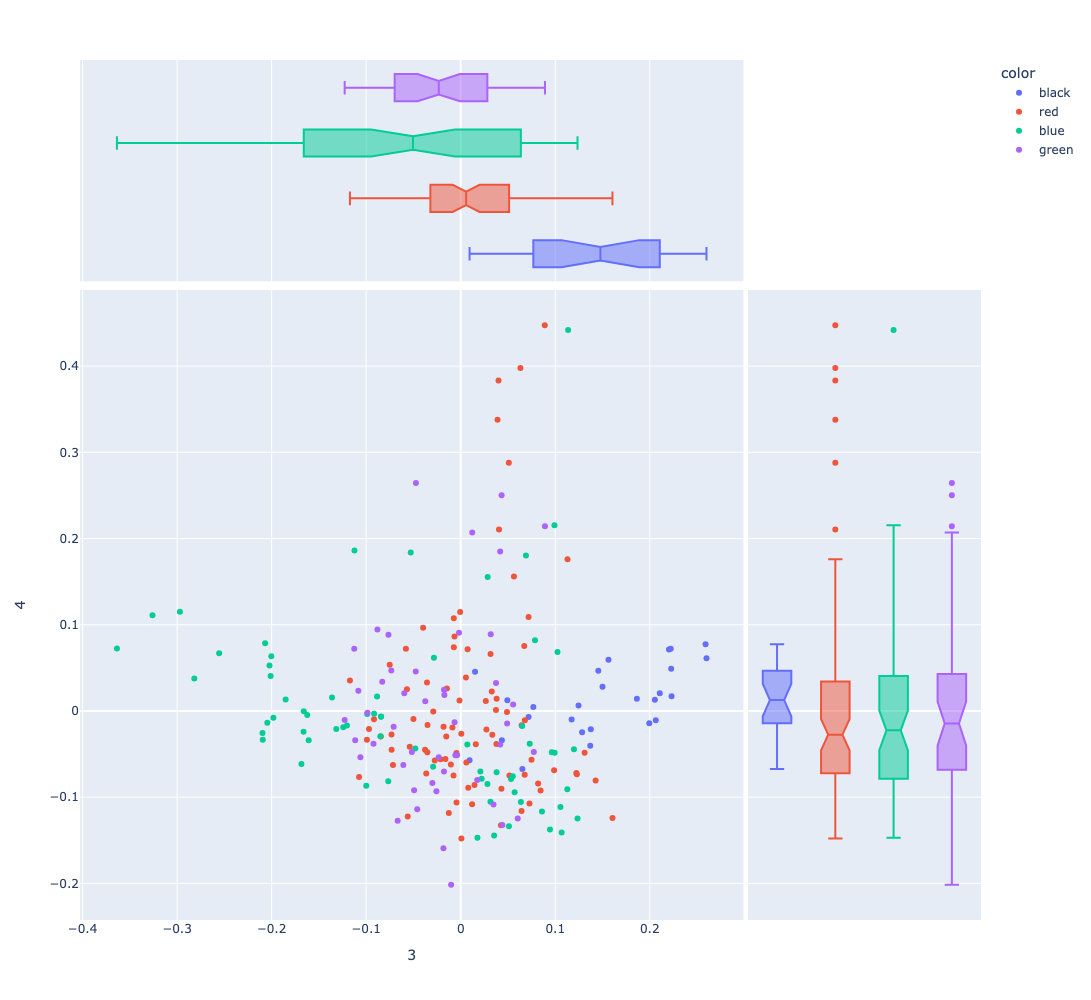

In [82]:
px.scatter(DCM, 3, 4, 
           color=DOC['cover color'], 
           hover_name=DOC.file, 
           marginal_x='box', marginal_y='box', height=1000)

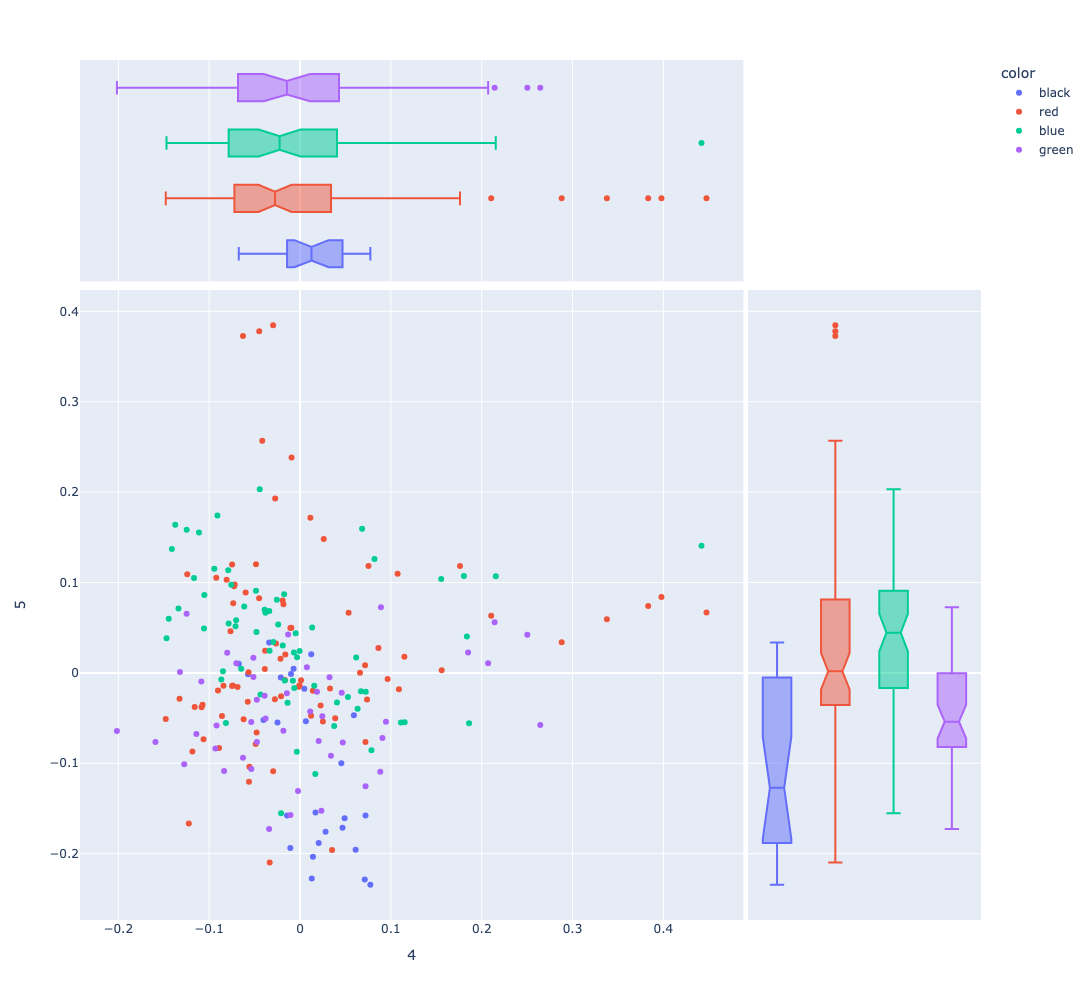

In [83]:
px.scatter(DCM, 4, 5, 
           color=DOC['cover color'], 
           hover_name=DOC.file, 
           marginal_x='box', marginal_y='box', height=1000)